In [1]:
import sys

In [2]:
sys.path.insert(1,'/shared/Final_submission/atomai/')

In [3]:
sys.path

['/shared/Final_submission/atomai/examples/notebooks',
 '/shared/Final_submission/atomai/',
 '/opt/anaconda/envs/shared_conda_env/lib/python310.zip',
 '/opt/anaconda/envs/shared_conda_env/lib/python3.10',
 '/opt/anaconda/envs/shared_conda_env/lib/python3.10/lib-dynload',
 '',
 '/home/pragalbh/.local/lib/python3.10/site-packages',
 '/opt/anaconda/envs/shared_conda_env/lib/python3.10/site-packages']

In [4]:
import atomai as aoi

/opt/anaconda/envs/shared_conda_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
print(aoi.__version__) #make sure the version is review

0.7.8_review_


In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Semantic segmentation

Download training/test data:

In [7]:
images = np.load('data_out_pv/X_train.npy')
labels = np.load('data_out_pv/y_train.npy')

# Load train data 


In [8]:
images_val = np.load('data_out_pv/X_val.npy')
labels_val = np.load('data_out_pv/y_val.npy')

# Load validation data 


In [9]:
images_test = np.load('data_out_pv/X_test.npy')
labels_test = np.load('data_out_pv/y_test.npy')

# Load test data 

In [10]:
print(images.shape, labels.shape)
print(images_val.shape, labels_val.shape)
print(images_test.shape, labels_test.shape)
# look at shape of images and labels(maps)

(2064, 1, 512, 512) (2064, 512, 512)
(516, 1, 512, 512) (516, 512, 512)
(43, 1, 512, 512) (43, 512, 512)


Let's plot some of the training data:

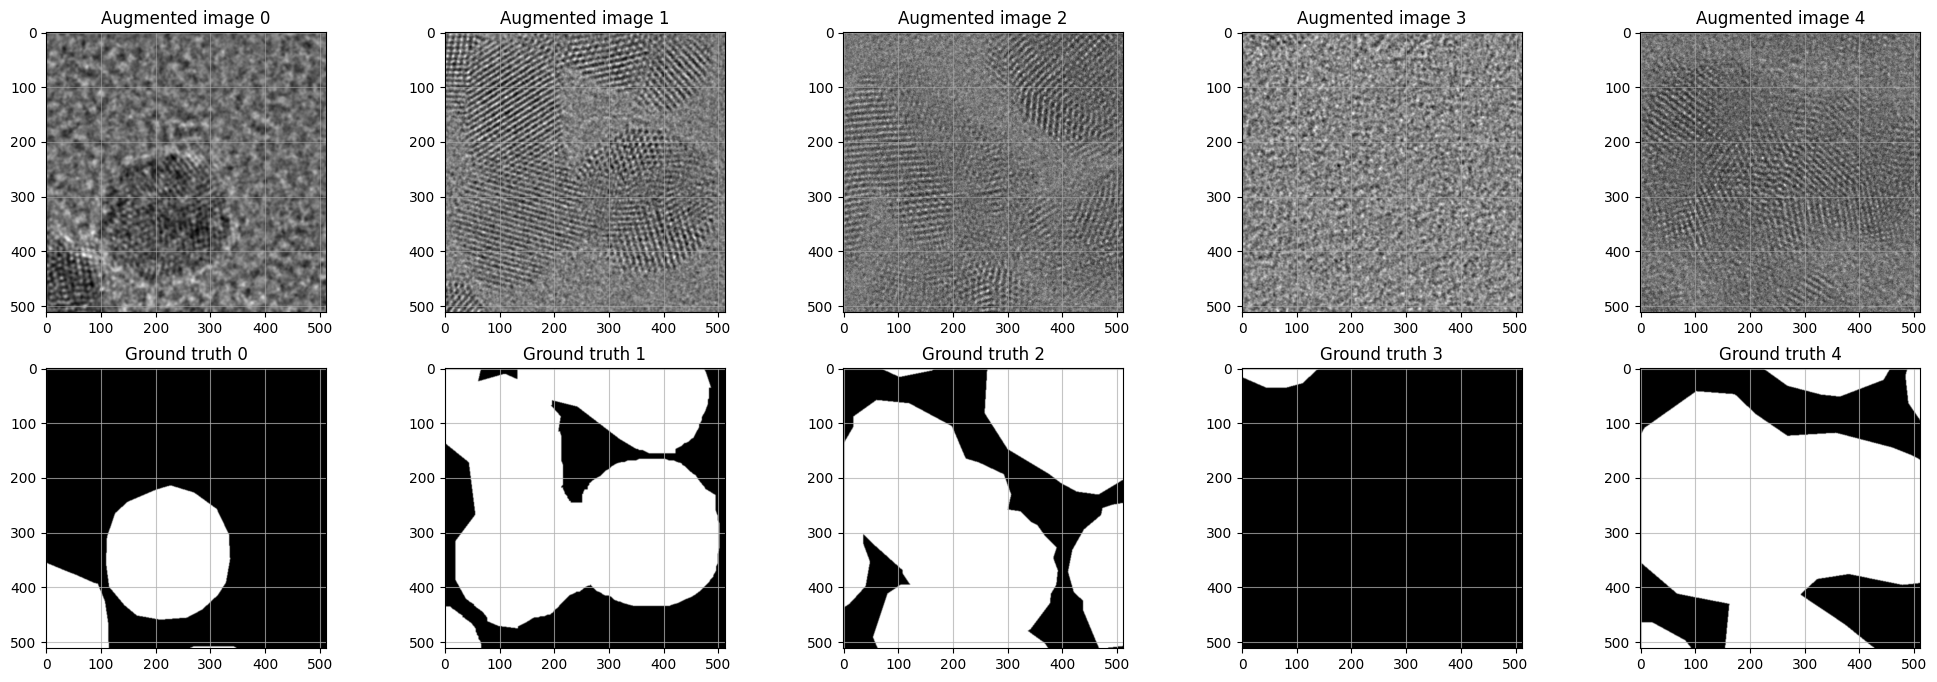

In [11]:
n = 5
k=1
n = n + 1
fig = plt.figure( figsize=(30, 8))
for i in range(1, n):   
    ax = fig.add_subplot(2, n, i)
    ax.imshow(images[i-1+k,0,:,:], cmap='gray')
    ax.set_title('Augmented image ' + str(i-1) )
    ax.grid(alpha = 0.5)
    ax = fig.add_subplot(2, n, i+n)
    if labels.shape[1] == 1:
        ax.imshow(labels[i-1+k, 0], cmap='gray', interpoltion='Gaussian')
    else:
        ax.imshow(labels[i-1+k], cmap='gray', interpolation='Gaussian')
                  
                  
    ax.set_title('Ground truth ' + str(i-1))
    ax.grid(alpha=0.75)

Initialize a nodel for semantic segmentation:

In [12]:
model = aoi.models.Segmentor(nb_classes=1) #load model with 1 class (positive class: atom)

In [13]:
print(model.net)

Unet(
  (c1): ConvBlock(
    (block): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c2): ConvBlock(
    (block): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LeakyReLU(negative_slope=0.01)
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c3): ConvBlock(
    (block): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

Train the initialized model:

(Here the accuracy is calculated as [Intersection over Union](https://en.wikipedia.org/wiki/Jaccard_index) (IoU) score, which is the area of overlap between the predicted segmentation and the ground truth divided by the area of union between them)

## The model has multiple additional features:
- **auto_thresh (bool):
        Performs automatic binary threshold selection for optimal f1-score
- **ES (bool):
        Early stopping mode on/off
- **patience (int):
         patience for early stopping
- **tolerance (float):
         tolerance for early stopping
- **weight_decay (float):
          weight decay for model 

/shared/Final_submission/atomai/atomai/utils/preproc.py:64: UserWarning: Adding a channel dimension of 1 to training labels
  warnings.warn(
/shared/Final_submission/atomai/atomai/utils/preproc.py:69: UserWarning: Adding a channel dimension of 1 to test labels
  warnings.warn(


Epoch 1/3000 ... Training loss: 0.7866 ... Test loss: 0.7147 ... Train Accuracy: 0.2254 ... Test Accuracy: 0.1861 ... GPU memory usage: 9105/20470
Updating Early stopping model @ epoch:  1
Updating Early stopping model @ epoch:  2
Updating Early stopping model @ epoch:  7
Updating Early stopping model @ epoch:  8
Updating Early stopping model @ epoch:  9
Updating Early stopping model @ epoch:  10
Updating Early stopping model @ epoch:  11
Updating Early stopping model @ epoch:  13
Updating Early stopping model @ epoch:  15
Updating Early stopping model @ epoch:  19
Updating Early stopping model @ epoch:  21
Updating Early stopping model @ epoch:  26
Updating Early stopping model @ epoch:  42
Updating Early stopping model @ epoch:  46
Updating Early stopping model @ epoch:  63
Updating Early stopping model @ epoch:  69
Updating Early stopping model @ epoch:  70
Updating Early stopping model @ epoch:  71
Updating Early stopping model @ epoch:  73
Epoch 100/3000 ... Training loss: 0.3434 

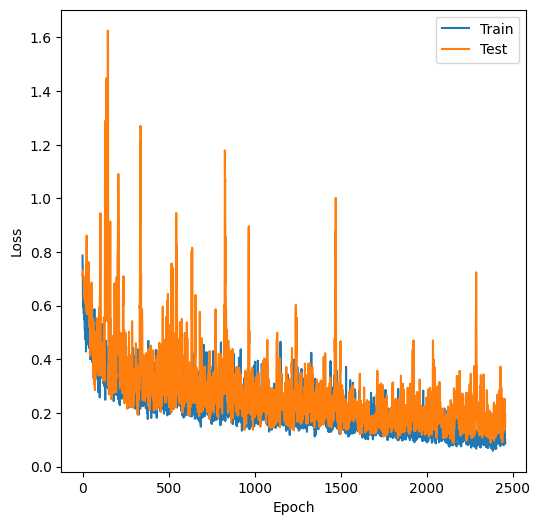

Calculating Automatic Threshold
Batch 516/516
516 images were decoded in approximately 7.7019 seconds


In [14]:
model.fit(images, labels, images_val, labels_val, # training data
          training_cycles=3000, compute_accuracy=True, batch_size=16, swa=False, filename='ES_reg',
          patience=300,tolerance=1e-4,verbose=True,auto_thresh=True)

In [15]:
model.binary_thresh #note the threshold if different from the default 0.5.
#This maximizes our f1-score

0.6

# predictions

In [16]:
model=aoi.load_model('ES_reg_metadict_final.tar')#can load the model from saved file

In [19]:
pred_auto=model.predict(images_test) #auto thresholding

Performing auto-thresh prediction
Batch 43/43
43 images were decoded in approximately 0.5183 seconds


In [21]:
pred_user=model.predict(images_test,thresh=0.5) #user can provide threshold as well

Batch 43/43
43 images were decoded in approximately 0.5092 seconds


In [ ]:
pred_auto[-1] #auto pred has an additional channel with class predictions for given best threshold

In [32]:
'''
Auto-thresholding has three channels;
with the last channel providing the class labels for the best threshold

Auto-thresholding is currently only implemented for binary-class
'''

'\nAuto-thresholding has three channels;\nwith the last channel providing the class labels for the best threshold\n\nAuto-thresholding is currently only implemented for binary-class\n'